<a href="https://colab.research.google.com/github/Himanshu-Barange/Deep-Learning-Projects/blob/main/Dry_Beans_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.options.display.float_format = '{:.2f}'.format

## Data Loading

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

## Data Inspection

In [4]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.29,208.18,173.89,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.01,0.00,0.83,1.00
1,28734,638.02,200.52,182.73,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00
2,29380,624.11,212.83,175.93,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.01,0.00,0.83,1.00
3,30008,645.88,210.56,182.52,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.01,0.00,0.86,0.99
4,30140,620.13,201.85,190.28,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.01,0.00,0.94,1.00


In [5]:
y.squeeze(axis = 1).unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
X.isna().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRatio,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


## Data Exploration

#### Distribution of Features

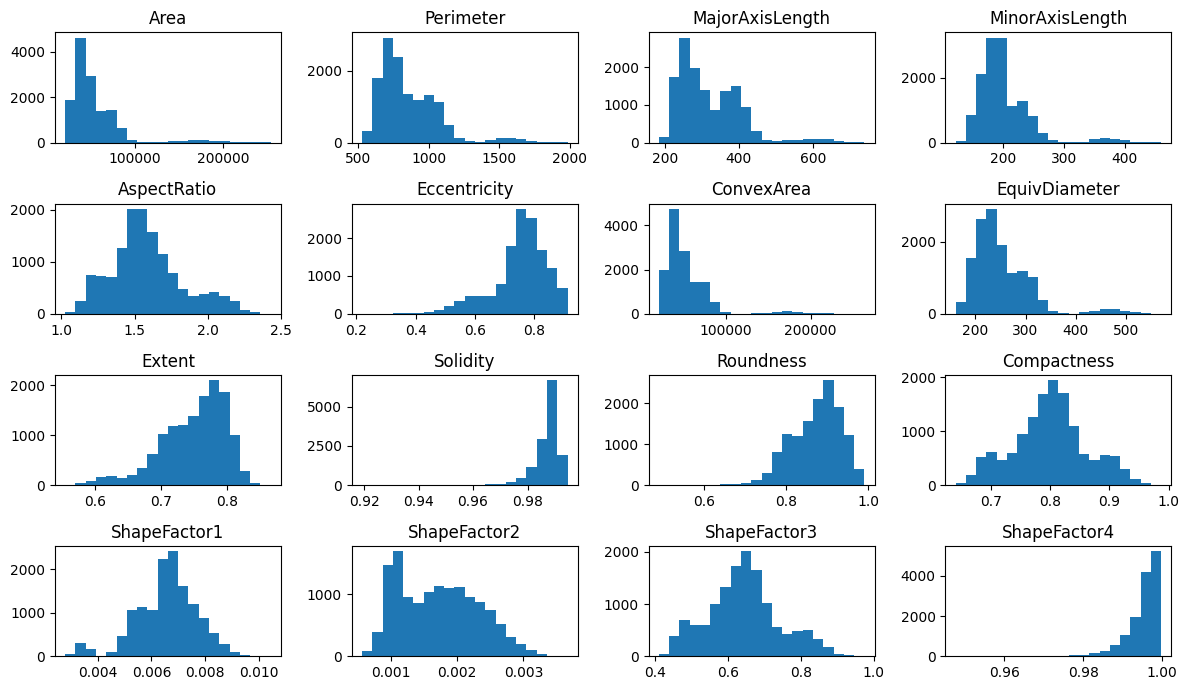

In [8]:
n = X.shape[1]
columns = X.columns

rows = int(np.ceil(n**0.5))
cols = int(np.ceil(n**0.5))

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12, 7))
k = 0

for i in range(rows):
    for j in range(cols):
        ax[i, j].hist(X[columns[k]], bins = 20)
        ax[i, j].set_title(columns[k])
        k += 1

plt.tight_layout()
plt.show()

#### Feature Correlation

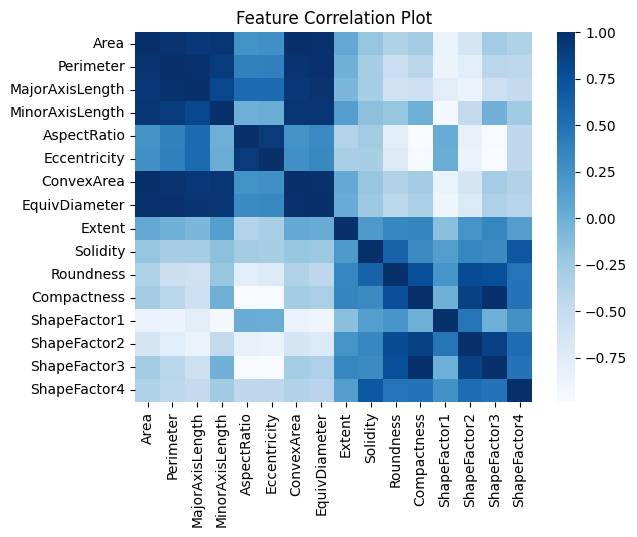

In [9]:
sns.heatmap(X.corr(), cmap = 'Blues')
plt.title("Feature Correlation Plot")
plt.show()

#### Label Distribution

In [11]:
y.value_counts().to_frame().style.background_gradient()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


## Preprocessing

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [13]:
scaler = RobustScaler()
cols_to_normalize = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']

for col in cols_to_normalize:
    X[col] = scaler.fit_transform(X[[col]])

In [14]:
y_factored = pd.factorize(y.squeeze())
y = pd.DataFrame(y_factored[0], index = y.index)

In [15]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.65,-0.67,-0.72,-0.45,1.20,0.55,-0.64,-0.75,0.76,0.99,0.96,0.91,0.01,0.00,0.83,1.00
1,-0.64,-0.57,-0.78,-0.24,1.10,0.41,-0.63,-0.73,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00
2,-0.61,-0.62,-0.68,-0.40,1.21,0.56,-0.61,-0.70,0.78,0.99,0.95,0.91,0.01,0.00,0.83,1.00
3,-0.59,-0.54,-0.70,-0.24,1.15,0.50,-0.57,-0.67,0.78,0.98,0.90,0.93,0.01,0.00,0.86,0.99
4,-0.58,-0.64,-0.77,-0.05,1.06,0.33,-0.58,-0.66,0.77,0.99,0.98,0.97,0.01,0.00,0.94,1.00


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

In [18]:
from sklearn.metrics import accuracy_score

## Model Selection

#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest = RandomForestClassifier(25, random_state = 36).fit(x_train, y_train)
predictions = random_forest.predict(x_test)
accuracy_score(y_test, predictions)

0.9159015791406537

#### Adaboost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
adaboost = AdaBoostClassifier().fit(x_train, y_train)
predictions = adaboost.predict(x_test)
accuracy_score(y_test, predictions)

0.6423062798384135

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
regressor = LogisticRegression().fit(x_train, y_train)
predictions = regressor.predict(x_test)
accuracy_score(y_test, predictions)

0.9081894968784429

#### XGBoost Classifier

In [25]:
pip install xgboost

In [26]:
import xgboost as xgb

In [27]:
xgbooster = xgb.XGBClassifier(seed = 36, eta = 0.31, max_depth = 4).fit(x_train, y_train)
predictions = xgbooster.predict(x_test)
accuracy_score(y_test, predictions)

0.9258171134777818

#### Tensorflow Neural Network

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [29]:
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

Epoch 1/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6376 - loss: 0.9672 - val_accuracy: 0.8840 - val_loss: 0.3110
Epoch 2/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8712 - loss: 0.3473 - val_accuracy: 0.8876 - val_loss: 0.3086
Epoch 3/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8879 - loss: 0.3078 - val_accuracy: 0.8876 - val_loss: 0.3003
Epoch 4/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8952 - loss: 0.2985 - val_accuracy: 0.8953 - val_loss: 0.2750
Epoch 5/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8957 - loss: 0.2889 - val_accuracy: 0.8950 - val_loss: 0.2818
Epoch 6/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9061 - loss: 0.2669 - val_accuracy: 0.9005 - val_loss: 0.2669
Epoch 7/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8995 - loss: 0.2762 - val_accuracy: 0.9034 - val_loss: 0.2557
Epoch 8/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9035 - loss: 0.2587 - val_accuracy: 0

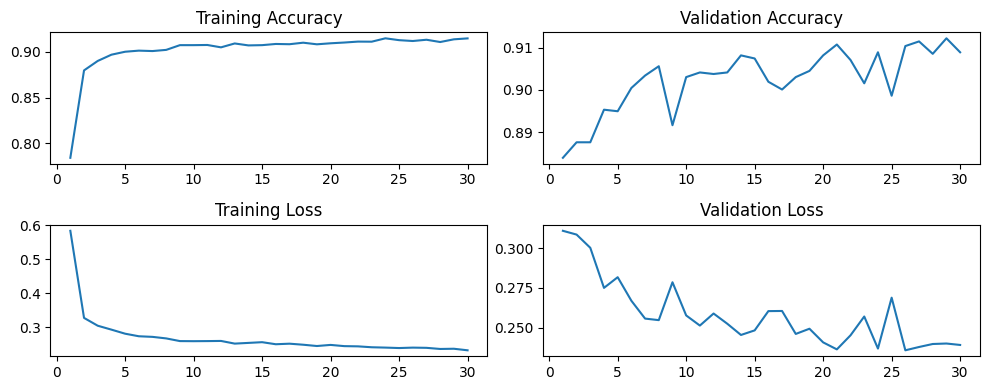

In [30]:
model = Sequential([
    Dense(64, activation = 'swish', kernel_initializer = tf.keras.initializers.HeUniform(seed = 36)),
    Dense(64, activation = 'swish', kernel_initializer = tf.keras.initializers.HeUniform(seed = 36)),
    Dense(64, activation = 'swish', kernel_initializer = tf.keras.initializers.HeUniform(seed = 36)),
    Dropout(0.25, seed = 36),
    Dense(7, activation = 'softmax', kernel_initializer =  tf.keras.initializers.HeUniform(seed = 36))
])

model.compile(
optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs = 30,
    validation_data = (x_test, y_test)
)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(range(1, len(accuracy)+1), accuracy, label = 'accuracy')
ax[0, 0].set_title('Training Accuracy')
ax[0, 1].plot(range(1, len(val_accuracy)+1), val_accuracy, label = 'val_accuracy')
ax[0, 1].set_title('Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1, 0].plot(range(1, len(loss)+1), loss)
ax[1, 0].set_title('Training Loss')
ax[1, 1].plot(range(1, len(val_loss)+1), val_loss)
ax[1, 1].set_title('Validation Loss')

plt.tight_layout()
plt.show()